In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
sns.set()

np.random.seed(0)

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
missing_values = np.isnan(x_train).sum() + np.isnan(x_test).sum()
if missing_values > 0:
    print(f"Số lượng giá trị bị thiếu: {missing_values}")
    x_train = np.nan_to_num(x_train, nan=np.mean(x_train))
    x_test = np.nan_to_num(x_test, nan=np.mean(x_test))


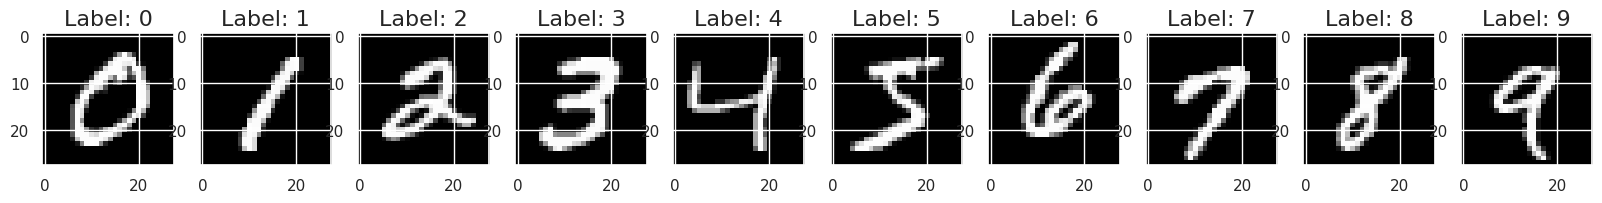

In [ ]:
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize = (20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [ ]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)

(60000, 784)


In [ ]:
# Trích xuất đặc trưng từ tầng trung gian
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[1].output)
features = intermediate_layer_model.predict(x_test)

# In kích thước của đặc trưng
print(f"Kích thước đặc trưng: {features.shape}")

313/313 [==============================] - 1s 2ms/step
Kích thước đặc trưng: (10000, 128)


In [ ]:
# Gom nhóm các đặc trưng theo kiểu dữ liệu
numeric_features = x_train.shape[1]
categorical_features = 0  # Không có đặc trưng phân loại trong trường hợp này

print(f"Số lượng đặc trưng số học: {numeric_features}")
print(f"Số lượng đặc trưng phân loại: {categorical_features}")


Số lượng đặc trưng số học: 784
Số lượng đặc trưng phân loại: 0


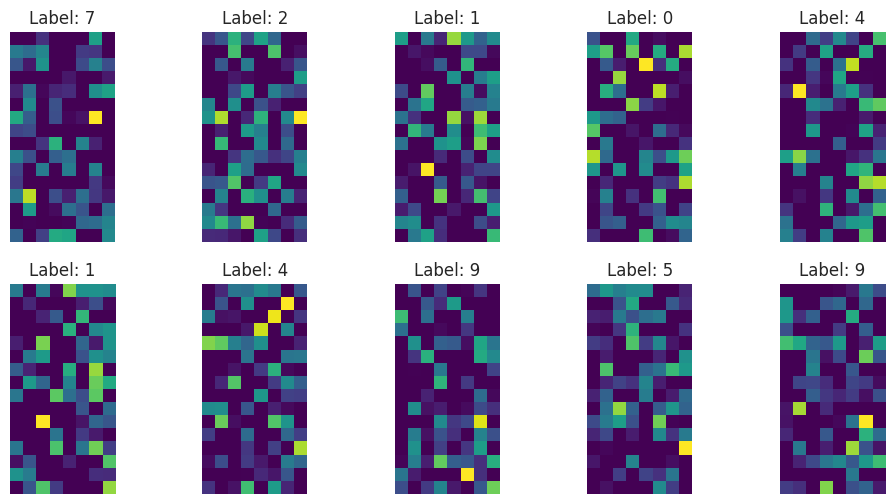

In [ ]:
# Hiển thị đặc trưng của một số mẫu
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(features[i].reshape(16, 8), cmap='viridis')  # Thay đổi kích thước hiển thị nếu cần
    plt.title(f'Label: {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
118/118 [==============================] - 3s 16ms/step - loss: 0.6058 - accuracy: 0.8277 - val_loss: 0.2315 - val_accuracy: 0.9327
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2304 - accuracy: 0.9339 - val_loss: 0.1586 - val_accuracy: 0.9542
Epoch 3/10
118/118 [==============================] - 4s 32ms/step - loss: 0.1696 - accuracy: 0.9512 - val_loss: 0.1288 - val_accuracy: 0.9614
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1368 - accuracy: 0.9605 - val_loss: 0.1124 - val_accuracy: 0.9661
Epoch 5/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1143 - accuracy: 0.9660 - val_loss: 0.0969 - val_accuracy: 0.9696
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0992 - accuracy: 0.9699 - val_loss: 0.0947 - val_accuracy: 0.9708
Epoch 7/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0879 - accuracy: 0.9744 - val_loss: 0.0850 - val_accuracy: 0.9733

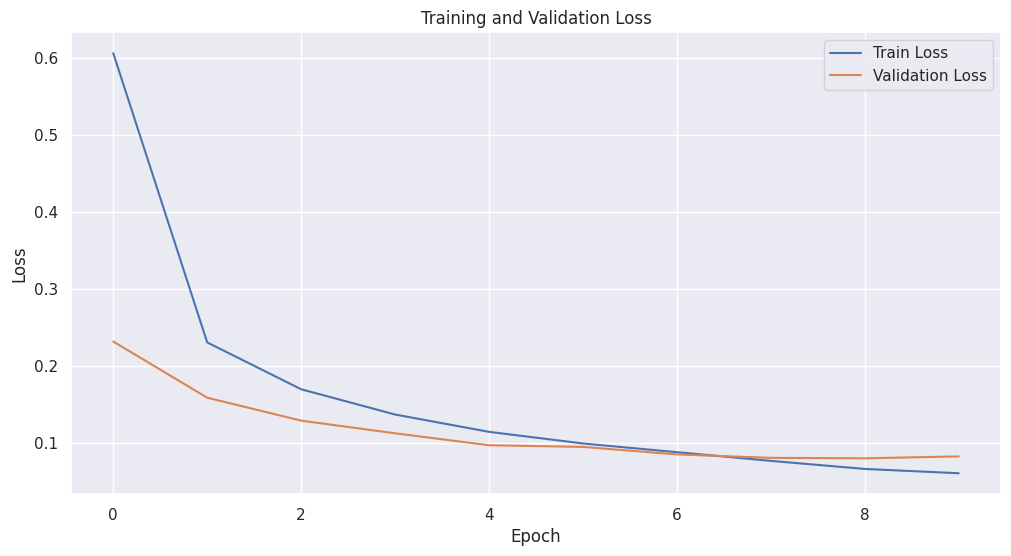

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}, \nTest Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9743
Test Loss: 0.08241523802280426, 
Test Accuracy: 0.9743000268936157


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.83815848e-06 5.60598096e-07 7.63329808e-06 ... 9.99901593e-01
  7.62223635e-07 1.49784464e-05]
 [1.44682019e-07 4.25109902e-05 9.99918282e-01 ... 1.61809712e-08
  5.11620556e-06 2.15462492e-11]
 [8.90136391e-07 9.98840392e-01 8.37700863e-05 ... 7.92835664e-04
  2.55380564e-05 2.66475672e-05]
 ...
 [1.86423388e-09 6.05276851e-09 1.08803544e-08 ... 5.60896951e-05
  1.58102739e-06 6.51165203e-04]
 [1.95090308e-07 1.91667368e-07 3.62176267e-09 ... 3.33173098e-08
  4.01632751e-05 1.48252415e-08]
 [1.24423266e-07 2.66507816e-10 1.99000226e-07 ... 1.92208222e-10
  2.58187285e-08 1.47039914e-09]]
[7 2 1 ... 4 5 6]


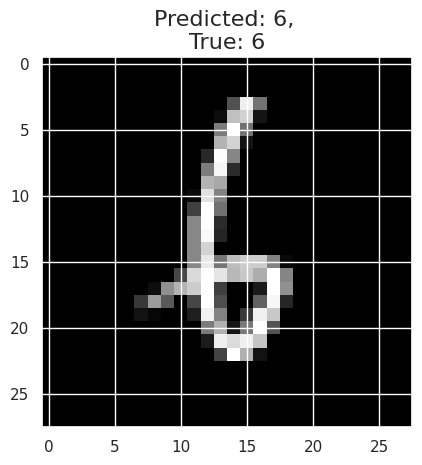

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f'Predicted: {y_sample_pred_class}, \nTrue: {y_sample_true}', fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')